# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# Third Place Report(Design, Data, AI) [V2022]
### 2022 Version for Contribution to Architectural Institute of Korea
### 제3 공간 분석과 적용 (디자인, 데이터, 인공지능), 대한건축학회 프로젝트 리포트 기고 버전

##### [DaumBrunch Full Version](https://brunch.co.kr/@njnamju/148)

-----
* Inital research, [MIT Media Lab, City Science](https://www.media.mit.edu/groups/city-science/overview/) <br>
  [Third Place Mobility Energy Consumption Per Person](http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab/index.html) <br>

* Paper <br>
  [Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore](https://doi.org/10.1007/978-981-33-4400-6_11)  <br>
  

* Contribution <br> [대한건축학회 : Architectural Institute of Korea](https://www.aik.or.kr/)
  제3 공간 분석과 적용 (디자인, 데이터, 인공지능)  <br> https://brunch.co.kr/@njnamju/148 <br>


-----
#### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# 3. Processing Data For Train

In [1]:
import math
import numpy as np
import pandas as pd
import json

In [2]:
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data

In [3]:
# THE_PATH = "data/raw/google-third-place-LA.json"
# THE_PATH = "data/raw/google-third-place-Redlands.json"
THE_PATH = "data/raw/google-third-place-Boston.json"

DATA_DIC = OpenJson(THE_PATH)

CLASS_LIST = []

for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

### 3.1. Distance

In [4]:
def distanceGPS2KM(l0, l1): # get distance(KM)
    R = 6378.137; # Radius of earth in KM // a = Equatorial radius (6,378.1370 km) // b = Polar radius (6,356.7523 km)
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d # * 1000; # // * 1000; // meters
    # return d; # // * 1000; // meters
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000
def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))
def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))

In [5]:
def GetDistanceClosest (loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 10000
        try:
            for j in range(len(data[i])):
                otherLoc = data[i][j]
                # distanceValue = distance(loc, otherLoc) 
                # distanceValue = distanceGPS2KM(loc, otherLoc)
                value = distanceGPS2Meter(loc, otherLoc)
                if (value < distanceValue):
                    distanceValue = value

            # if len(data[i]) != 0:
            #     distanceValue = distanceValue / len(data[i])
        except:
            pass
        distanceList.append(distanceValue)
    return distanceList

In [6]:
from tqdm import tqdm
dataDic = DATA_DIC
dataSet = []

for i in tqdm(CLASS_LIST):
    for j in range(len(dataDic[i])):
        loc = dataDic[i][j]
        
        result = GetDistanceClosest(loc, dataDic, CLASS_LIST)
        # print(CLASS_LIST.index(i))
        result.append(CLASS_LIST.index(i))
        dataSet.append(result)

100%|██████████| 95/95 [00:44<00:00,  2.11it/s]


In [7]:
dataframeDis = pd.DataFrame.from_records(dataSet, columns=[*CLASS_LIST, "class"] )
dataframeDis.describe()

accounting       airport  amusement_park      aquarium   art_gallery  \
count   4273.000000   4273.000000     4273.000000   4273.000000   4273.000000   
mean    1037.883011    799.146507     9946.173648   2062.789549   9946.173648   
std      883.494644    861.440551      731.772887   1132.066057    731.772887   
min        0.000000      0.000000        0.000000      0.000000      0.000000   
25%      578.087082    269.450879    10000.000000   1238.407866  10000.000000   
50%      919.191736    713.305421    10000.000000   2097.516926  10000.000000   
75%     1381.957135   1132.301356    10000.000000   2710.208750  10000.000000   
max    10000.000000  10000.000000    10000.000000  10000.000000  10000.000000   

                atm        bakery          bank           bar  beauty_salon  \
count   4273.000000   4273.000000   4273.000000   4273.000000   4273.000000   
mean     291.296769    424.817792    291.712034    545.383272   9946.173648   
std      747.632244    779.319701    747.762965    869.759263    731.772887   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       68.449050    111.306846     67.657588    126.983071  10000.000000   
50%      161.651103    284.646073    173.142469    306.974639  10000.000000   
75%      366.276150    559.222466    365.593584    677.867293  10000.000000   
max    10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   

       ...         store  subway_station     synagogue    taxi_stand  \
count  ...   4273.000000     4273.000000   4273.000000   4273.000000   
mean   ...    260.859797      978.948384    889.128190   9946.173648   
std    ...    743.792858      856.339958    946.870220    731.772887   
min    ...      0.000000        0.000000      0.000000      0.000000   
25%    ...     51.881335      513.905760    339.592924  10000.000000   
50%    ...    154.500211      855.186439    703.998720  10000.000000   
75%    ...    315.001388     1273.999656   1158.802670  10000.000000   
max    ...  10000.000000    10000.000000  10000.000000  10000.000000   

       train_station  travel_agency    university  veterinary_care  \
count    4273.000000    4273.000000   4273.000000      4273.000000   
mean     9946.173648     739.875268   1104.105794       970.567811   
std       731.772887     832.824498    965.253028       930.933578   
min         0.000000       0.000000      0.000000         0.000000   
25%     10000.000000     309.505627    363.782439       435.160077   
50%     10000.000000     590.451167   1142.873912       797.432348   
75%     10000.000000    1050.044677   1639.618924      1283.587498   
max     10000.000000   10000.000000  10000.000000     10000.000000   

                zoo        class  
count   4273.000000  4273.000000  
mean    1382.208342    48.517903  
std      933.602174    25.885158  
min        0.000000     0.000000  
25%      880.881201    27.000000  
50%     1241.484225    50.000000  
75%     1771.763386    69.000000  
max    10000.000000    94.000000  

[8 rows x 96 columns]

96
atm


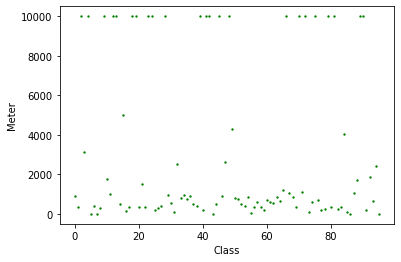

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

index = 100
dataVis = dataframeDis.iloc[index]
print(len(dataVis))
print(CLASS_LIST[int(dataVis[-1])])

x = np.arange(0.0, len(dataVis) , 1.0)
y = dataVis.transpose(); 
s = 2
plt.scatter(
    x, y, s, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.xlabel("Class")
plt.ylabel("Meter")
plt.show()

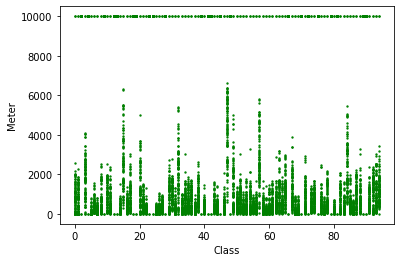

In [9]:
for i in range(100):
    # print (i)
    plt.scatter(
        x[:-1], dataframeDis.iloc[i][:-1], s, c="g", alpha=0.9, 
        marker= 'o',
    )
plt.xlabel("Class")
plt.ylabel("Meter")
plt.show()

id: 6
Num of bakery 57


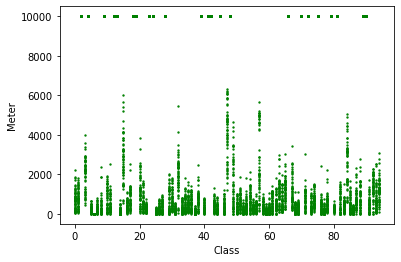

id: 14
Num of cafe 107


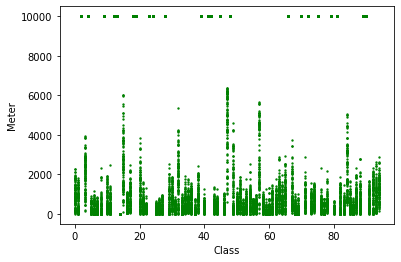

id: 49
Num of hospital 61


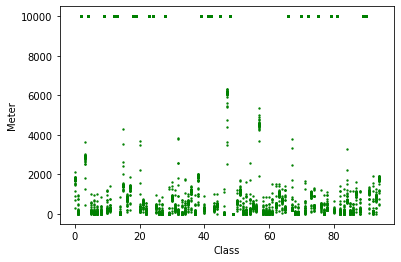

id: 7
Num of bank 107


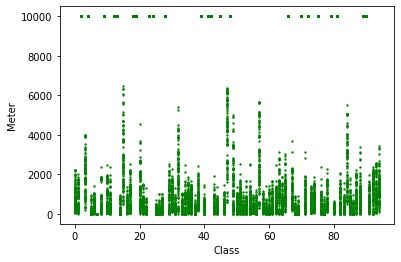

id: 68
Num of park 152


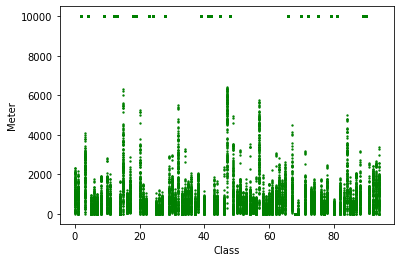

In [10]:
classList = ['bakery', 'cafe', 'hospital' ,'bank', 'park'] 

for c in classList:

    classID = CLASS_LIST.index(c)
    # classID = CLASS_LIST.index("cafe")
    print('id:', classID)

    dataVis = dataframeDis.loc[dataframeDis['class'] == classID]

    # dataVis = dataframeDis['bakery']
    print("Num of", c , len(dataVis))
    # print(dataVis)

    x = range(len(dataVis.iloc[0]))
    for i in range(len(dataVis)):
        # print (x)
        plt.scatter(
            x[:-1], dataVis.iloc[i][:-1], s, c="g", alpha=0.9, 
            marker= 'o',
        )
    plt.xlabel("Class")
    plt.ylabel("Meter")
    plt.show()

<AxesSubplot:>

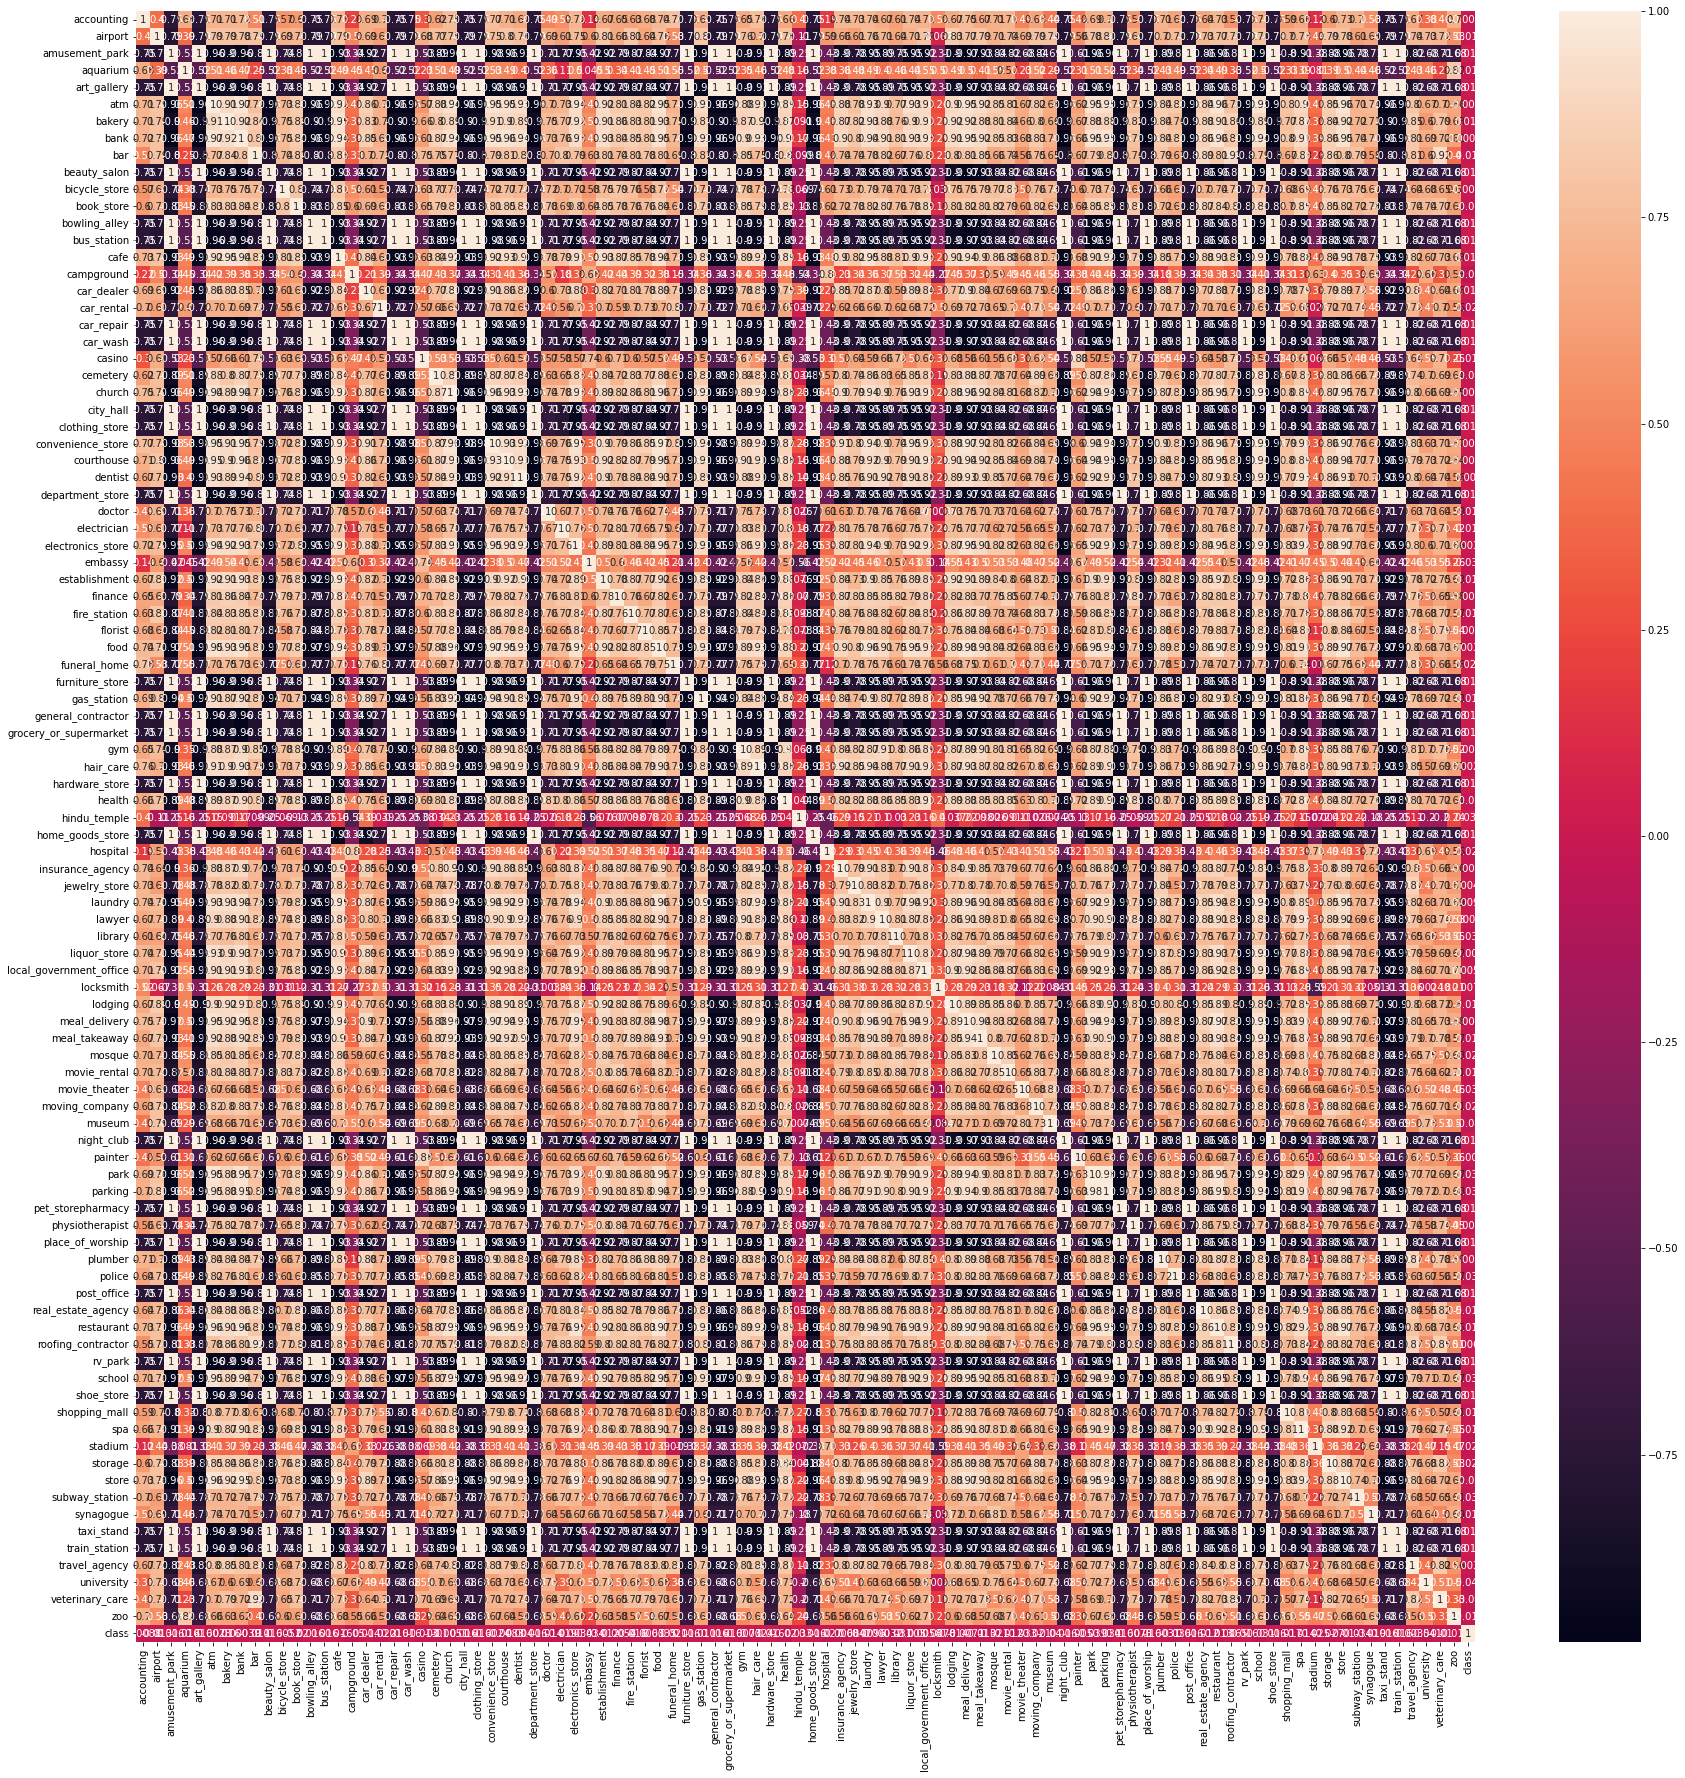

In [11]:
import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(dataframeDis.corr(),  annot=True)

In [12]:
dataframeDis.to_csv('data/processed/google-third-place-Boston_DistanceClosest.csv')

### 3.2. Decay

In [13]:
def getDecay(cost, b = 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0 m,  1.0
50 m,  0.6050060671375364
100 m,  0.3660323412732292
150 m,  0.22145178723886091
200 m,  0.13397967485796172
250 m,  0.08105851616218128
300 m,  0.04904089407128572
350 m,  0.029670038450977102
400 m,  0.017950553275045137
450 m,  0.010860193639877882


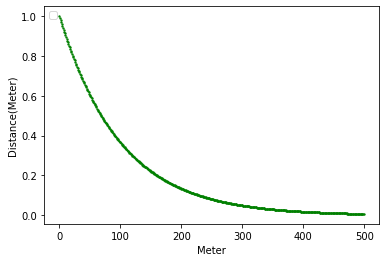

In [14]:
decayList = [];
for i in range(0, 500, 1):
    if (i % 50 == 0):
        print (i, 'm, ' , getDecay(i))
    decayList.append(getDecay(i))

x = np.arange(0.0, len(decayList) , 1.0)
y = decayList
s = 2
plt.scatter(
    x, y, s, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.xlabel("Meter")
plt.ylabel("Distance(Meter)")
plt.legend(loc='upper left')
plt.show()


In [15]:
def getDecay(cost, b = 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)
def getData(BETA):
    decayList = [];
    for i in range(0, 501, 1):
        if (i % 50 == 0 or i == 500):
            print (i, 'm, ' , getDecay(i, BETA) * 100)
        decayList.append(getDecay(i, BETA) * 100)

    x = np.arange(0.0, len(decayList) , 1.0)
    y = decayList
    return [x, y]
def vizDecay(x, y, BETA, color):
    plt.figure(figsize =(8 *0.4, 5 * 0.4), dpi=90)
    plt.title("β: " + str(BETA))
    plt.xlabel("Distance (Meter)")
    plt.ylabel("Probability (100%)")
    plt.plot( x, y, c=color, alpha=1, )
    plt.show()


0 m,  100.0
50 m,  36.41696800871168
100 m,  13.261955589475294
150 m,  4.829602124348767
200 m,  1.75879466057215
250 m,  0.6404996888794889
300 m,  0.23325056679514128
350 m,  0.08494278428992526
400 m,  0.03093358658057105
450 m,  0.011265074328993686
500 m,  0.004102398514547222


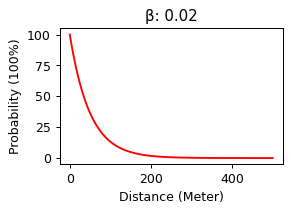

In [16]:
BETA_0 = 0.02
x0, y0 = getData(BETA_0)
vizDecay(x0, y0, BETA_0, 'r')

0 m,  100.0
50 m,  60.50060671375363
100 m,  36.60323412732292
150 m,  22.14517872388609
200 m,  13.397967485796173
250 m,  8.105851616218128
300 m,  4.9040894071285726
350 m,  2.96700384509771
400 m,  1.7950553275045138
450 m,  1.0860193639877882
500 m,  0.6570483042414603


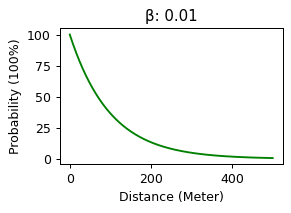

In [17]:
BETA_1 = 0.01
x1, y1 = getData(BETA_1)

vizDecay(x1, y1, BETA_1, "g")

0 m,  100.0
50 m,  81.84024506760997
100 m,  66.97825712726458
150 m,  54.81516977496729
200 m,  44.860869278059695
250 m,  36.71424535662421
300 m,  30.047028374584873
350 m,  24.590561657294565
400 m,  20.124975923831602
450 m,  16.47032961586129
500 m,  13.479358121064026


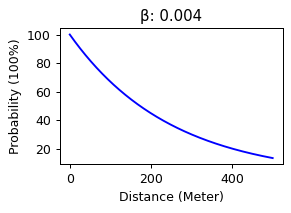

In [18]:
BETA_2 = 0.004
x2, y2 = getData(BETA_2)

vizDecay(x2, y2, BETA_2, "b")

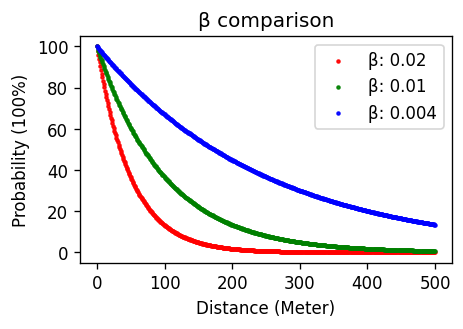

In [19]:
plt.figure(figsize =(8 * 0.5, 5 * 0.5), dpi=120)
plt.title("β comparison")
plt.xlabel("Distance (Meter)")
plt.ylabel("Probability (100%)")
plt.scatter(
    x0, y0, s = 3, c="r", alpha=0.9, 
    marker= 'o',
    )
plt.scatter(
    x1, y1, s = 3, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.scatter(
    x2, y2, s = 3, c="b", alpha=0.9, 
    marker= 'o',
    )
plt.legend(["β: {}".format(BETA_0), "β: {}".format(BETA_1), "β: {}".format(BETA_2)], loc ="upper right")
plt.show()

In [20]:
data = []

for i in range(0, len(x0), 25):
    dis0 = "{:.2f} %".format(y0[i])
    dis1 = "{:.2f} %".format(y1[i])
    dis2 = "{:.2f} %".format(y2[i])
    mile = "{:.3f}".format(i * 0.000621) 
    print( "{} Meter, {} Mile : {}, {}, {}".format(i, mile, dis0, dis1, dis2))
    data.append([i, mile, y0[i], y1[i], y2[i]])

0 Meter, 0.000 Mile : 100.00 %, 100.00 %, 100.00 %
25 Meter, 0.016 Mile : 60.35 %, 77.78 %, 90.47 %
50 Meter, 0.031 Mile : 36.42 %, 60.50 %, 81.84 %
75 Meter, 0.047 Mile : 21.98 %, 47.06 %, 74.04 %
100 Meter, 0.062 Mile : 13.26 %, 36.60 %, 66.98 %
125 Meter, 0.078 Mile : 8.00 %, 28.47 %, 60.59 %
150 Meter, 0.093 Mile : 4.83 %, 22.15 %, 54.82 %
175 Meter, 0.109 Mile : 2.91 %, 17.22 %, 49.59 %
200 Meter, 0.124 Mile : 1.76 %, 13.40 %, 44.86 %
225 Meter, 0.140 Mile : 1.06 %, 10.42 %, 40.58 %
250 Meter, 0.155 Mile : 0.64 %, 8.11 %, 36.71 %
275 Meter, 0.171 Mile : 0.39 %, 6.30 %, 33.21 %
300 Meter, 0.186 Mile : 0.23 %, 4.90 %, 30.05 %
325 Meter, 0.202 Mile : 0.14 %, 3.81 %, 27.18 %
350 Meter, 0.217 Mile : 0.08 %, 2.97 %, 24.59 %
375 Meter, 0.233 Mile : 0.05 %, 2.31 %, 22.25 %
400 Meter, 0.248 Mile : 0.03 %, 1.80 %, 20.12 %
425 Meter, 0.264 Mile : 0.02 %, 1.40 %, 18.21 %
450 Meter, 0.279 Mile : 0.01 %, 1.09 %, 16.47 %
475 Meter, 0.295 Mile : 0.01 %, 0.84 %, 14.90 %
500 Meter, 0.310 Mile : 0.0

In [21]:
df = pd.DataFrame(data, columns=['Distance(Meter)', "Distance(Mile)", "β : {}".format(BETA_0), "β : {}".format(BETA_1), "β : {}".format(BETA_2)])
df

Distance(Meter) Distance(Mile)    β : 0.02    β : 0.01   β : 0.004
0                 0          0.000  100.000000  100.000000  100.000000
1                25          0.016   60.346473   77.782136   90.465598
2                50          0.031   36.416968   60.500607   81.840245
3                75          0.047   21.976356   47.058664   74.037267
4               100          0.062   13.261956   36.603234   66.978257
5               125          0.078    8.003122   28.470777   60.592281
6               150          0.093    4.829602   22.145179   54.815170
7               175          0.109    2.914495   17.224993   49.588871
8               200          0.124    1.758795   13.397967   44.860869
9               225          0.140    1.061371   10.421225   40.583654
10              250          0.155    0.640500    8.105852   36.714245
11              275          0.171    0.386519    6.304905   33.213762
12              300          0.186    0.233251    4.904089   30.047028
13              325          0.202    0.140758    3.814505   27.182224
14              350          0.217    0.084943    2.967004   24.590562
15              375          0.233    0.051260    2.307799   22.245999
16              400          0.248    0.030934    1.795055   20.124976
17              425          0.264    0.018667    1.396232   18.206180
18              450          0.279    0.011265    1.086019   16.470330
19              475          0.295    0.006798    0.844729   14.899982
20              500          0.310    0.004102    0.657048   13.479358

In [22]:
def GetDistanceDecayAverage(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        try:
            for j in range(len(data[i])):
                otherLoc = data[i][j]
                distanceValue += getDecay(distanceGPS2Meter(loc, otherLoc), BATA)
            if len(data[i]) != 0:
                distanceValue = distanceValue / len(data[i])
        except:
            pass
        distanceList.append(distanceValue)
    return distanceList
def GetDistanceDecayClosest(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        try:
            for j in range(len(data[i])):
                otherLoc = data[i][j]
                value = getDecay(distanceGPS2Meter(loc, otherLoc), BATA)
                if distanceValue < value:
                    distanceValue = value
            # if len(data[i]) != 0:
            #     distanceValue = distanceValue / len(data[i])
        except:
            pass
        distanceList.append(distanceValue)
    return distanceList

In [23]:
dataDic = DATA_DIC
dataSet = []

BATA = 0.01;

for i in tqdm(CLASS_LIST):
    for j in range(len(dataDic[i])):
        loc = dataDic[i][j]
        
        result = GetDistanceDecayClosest(loc, dataDic, CLASS_LIST, BATA)
        # print(CLASS_LIST.index(i))
        result.append(CLASS_LIST.index(i))
        dataSet.append(result)

dataframeDecay = pd.DataFrame.from_records(dataSet, columns=[*CLASS_LIST, "class"] )
dataframeDecay.describe()

100%|██████████| 95/95 [00:51<00:00,  1.85it/s]


accounting      airport  amusement_park      aquarium  art_gallery  \
count  4.273000e+03  4273.000000     4273.000000  4.273000e+03  4273.000000   
mean   4.504839e-02     0.093496        0.005383  7.981687e-03     0.005383   
std    1.391722e-01     0.208675        0.073177  5.737157e-02     0.073177   
min    0.000000e+00     0.000000        0.000000  0.000000e+00     0.000000   
25%    9.290221e-07     0.000011        0.000000  1.480697e-12     0.000000   
50%    9.725388e-05     0.000770        0.000000  6.994341e-10     0.000000   
75%    2.997522e-03     0.066665        0.000000  3.931793e-06     0.000000   
max    1.000000e+00     1.000000        1.000000  1.000000e+00     1.000000   

               atm       bakery         bank          bar  beauty_salon  ...  \
count  4273.000000  4273.000000  4273.000000  4273.000000   4273.000000  ...   
mean      0.302967     0.213205     0.303999     0.191574      0.005383  ...   
std       0.315281     0.293311     0.323458     0.281196      0.073177  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.025193     0.003623     0.025366     0.001100      0.000000  ...   
50%       0.196981     0.057224     0.175496     0.045721      0.000000  ...   
75%       0.502612     0.326714     0.506626     0.279090      0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000      1.000000  ...   

             store  subway_station    synagogue   taxi_stand  train_station  \
count  4273.000000     4273.000000  4273.000000  4273.000000    4273.000000   
mean      0.345746        0.033441     0.073308     0.005383       0.005383   
std       0.342628        0.120444     0.185655     0.073177       0.073177   
min       0.000000        0.000000     0.000000     0.000000       0.000000   
25%       0.042177        0.000003     0.000009     0.000000       0.000000   
50%       0.211659        0.000185     0.000846     0.000000       0.000000   
75%       0.593674        0.005713     0.032941     0.000000       0.000000   
max       1.000000        1.000000     1.000000     1.000000       1.000000   

       travel_agency    university  veterinary_care           zoo        class  
count    4273.000000  4.273000e+03      4273.000000  4.273000e+03  4273.000000  
mean        0.076936  1.301852e-01         0.052110  1.475526e-02    48.517903  
std         0.179483  2.908955e-01         0.147185  9.809185e-02    25.885158  
min         0.000000  0.000000e+00         0.000000  0.000000e+00     0.000000  
25%         0.000026  6.972403e-08         0.000002  1.847556e-08    27.000000  
50%         0.002647  1.027017e-05         0.000331  3.812088e-06    50.000000  
75%         0.044573  2.583214e-02         0.012607  1.429305e-04    69.000000  
max         1.000000  1.000000e+00         1.000000  1.000000e+00    94.000000  

[8 rows x 96 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


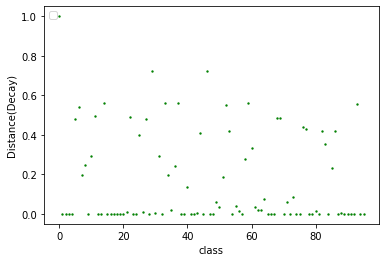

In [24]:
dataVis = dataframeDecay.iloc[0]
len(dataVis)

x = np.arange(0.0, len(dataVis) , 1.0)
y = dataVis.transpose(); 
s = 2
plt.scatter(
    x, y, s, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.xlabel("class")
plt.ylabel("Distance(Decay)")
plt.legend(loc='upper left')
plt.show()

id: 6
Num of bakery 57


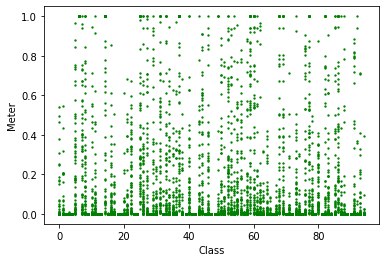

id: 14
Num of cafe 107


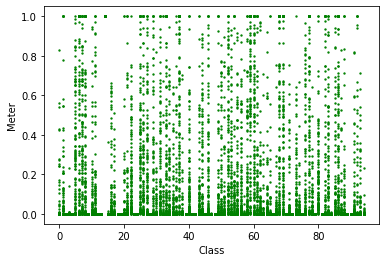

id: 49
Num of hospital 61


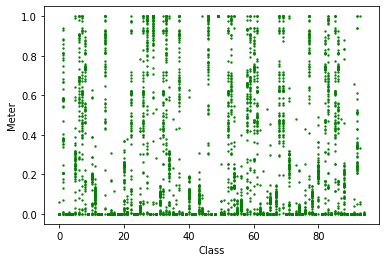

id: 7
Num of bank 107


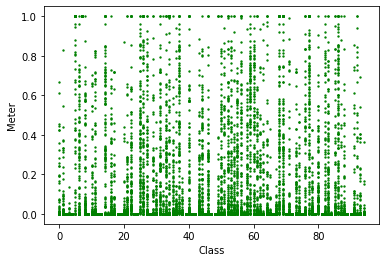

id: 68
Num of park 152


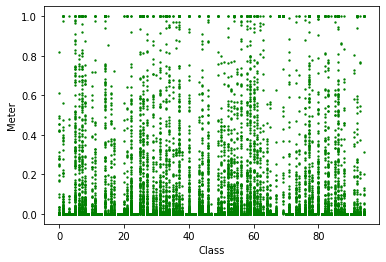

In [25]:
classList = ['bakery', 'cafe', 'hospital' ,'bank', 'park'] 

for c in classList:

    classID = CLASS_LIST.index(c)
    # classID = CLASS_LIST.index("cafe")
    print('id:', classID)

    dataVis = dataframeDecay.loc[dataframeDecay['class'] == classID]

    # dataVis = dataframeDecay['bakery']
    print("Num of", c , len(dataVis))
    # print(dataVis)

    x = range(len(dataVis.iloc[0]))
    for i in range(len(dataVis)):
        # print (x)
        plt.scatter(
            x[:-1], dataVis.iloc[i][:-1], s, c="g", alpha=0.9, 
            marker= 'o',
        )
    plt.xlabel("Class")
    plt.ylabel("Meter")
    plt.show()

<AxesSubplot:>

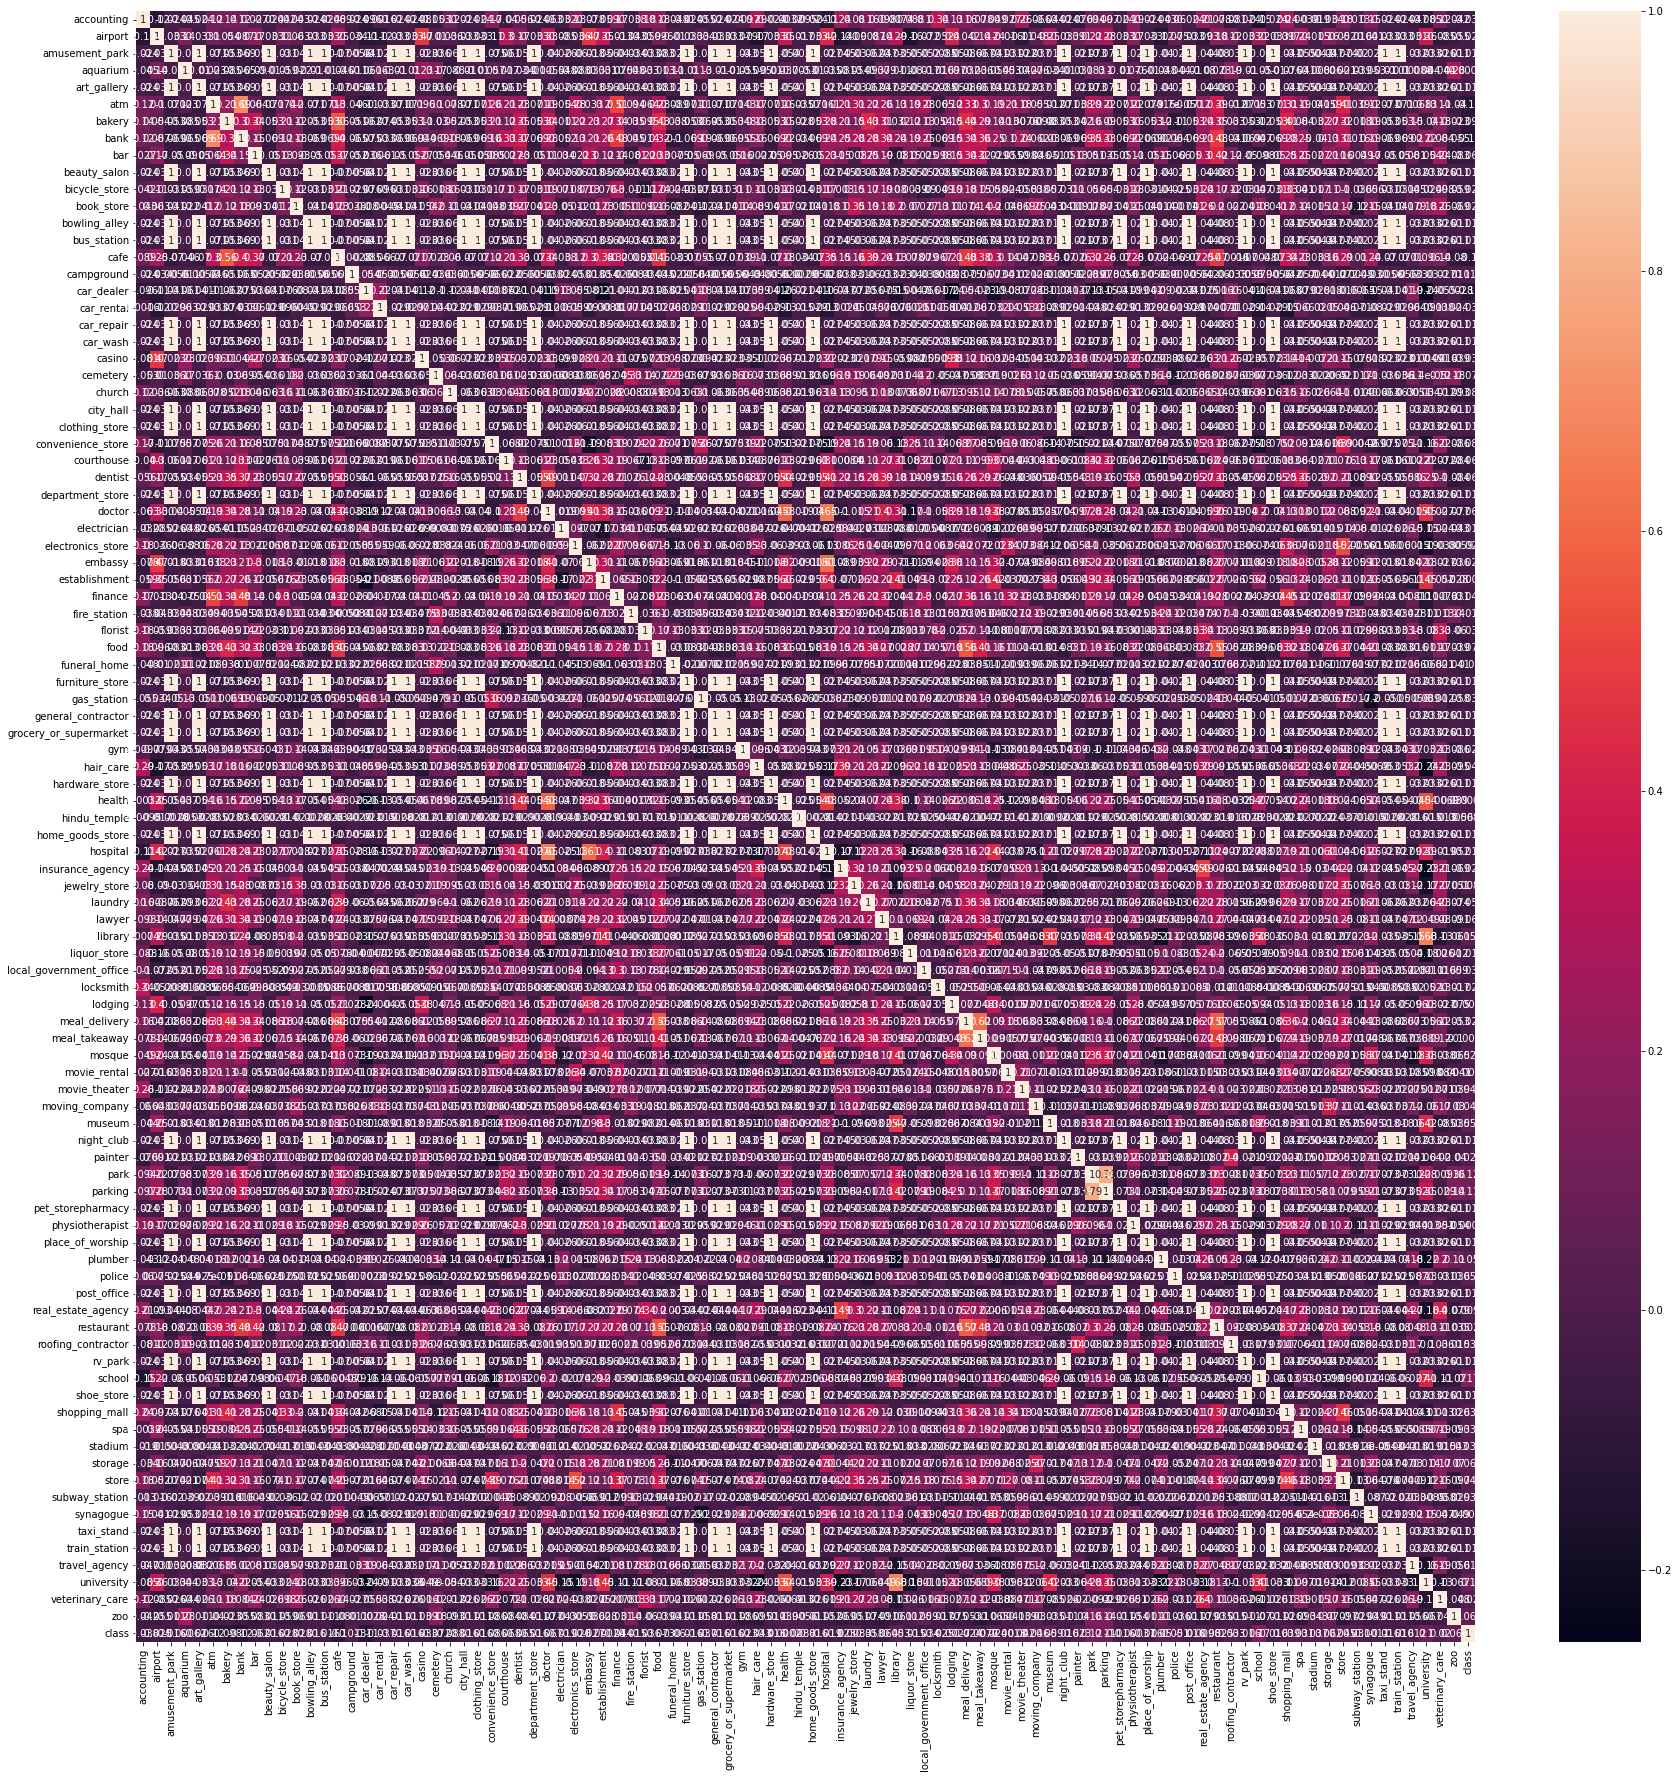

In [26]:
import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(dataframeDecay.corr(),  annot=True)

In [27]:
dataframeDecay.to_csv('data/processed/google-third-place-Boston_DecayClosest.csv')

### 3.3. Process distance and decay cost in Los Angeles and Redlands

In [28]:
dataDic = OpenJson('data/raw/google-third-place-LA.json')
dataSetDis = []
dataSetDecay = []
BATA = 0.01
for i in tqdm(CLASS_LIST):
    for j in range(len(dataDic[i])):
        loc = dataDic[i][j]
        classID = CLASS_LIST.index(i)
        
        resultDis = GetDistanceClosest(loc, dataDic, CLASS_LIST)
        resultDis.append(classID)
        dataSetDis.append(resultDis)

        resultDecay = GetDistanceDecayClosest(loc, dataDic, CLASS_LIST, BATA)
        resultDecay.append(classID)
        dataSetDecay.append(resultDecay)

100%|██████████| 95/95 [04:35<00:00,  2.90s/it]


In [29]:
dataframeDisLA = pd.DataFrame.from_records(dataSetDis, columns=[*CLASS_LIST, "class"] )
dataframeDisLA.describe()
dataframeDisLA.to_csv('data/processed/google-third-place-LA_DistanceClosest.csv')

id: 6
Num of bakery 171


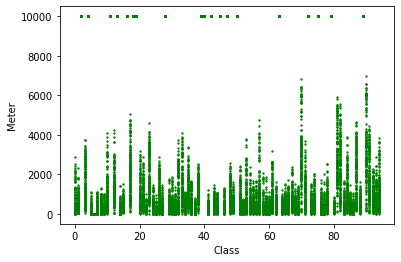

id: 14
Num of cafe 192


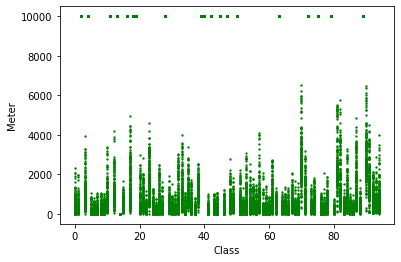

id: 49
Num of hospital 94


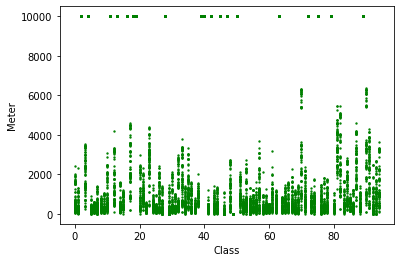

id: 7
Num of bank 199


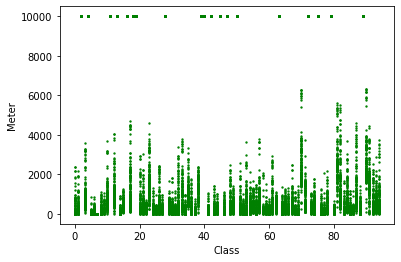

id: 68
Num of park 169


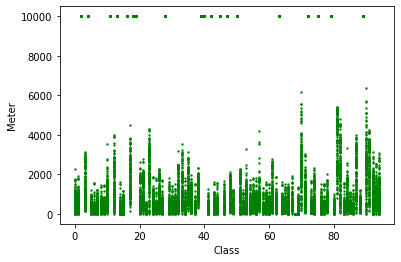

In [30]:
classList = ['bakery', 'cafe', 'hospital' ,'bank', 'park'] 

for c in classList:
    classID = CLASS_LIST.index(c)
    print('id:', classID)
    dataVis = dataframeDisLA.loc[dataframeDisLA['class'] == classID]
    print("Num of", c , len(dataVis))
    x = range(len(dataVis.iloc[0]))
    for i in range(len(dataVis)):
        # print (x)
        plt.scatter(
            x[:-1], dataVis.iloc[i][:-1], s, c="g", alpha=0.9, 
            marker= 'o',
        )
    plt.xlabel("Class")
    plt.ylabel("Meter")
    plt.show()

In [31]:
dataframeDecayLA = pd.DataFrame.from_records(dataSetDecay, columns=[*CLASS_LIST, "class"] )
dataframeDecayLA.describe()
dataframeDecayLA.to_csv('data/processed/google-third-place-LA_DecayClosest.csv')

id: 6
Num of bakery 171


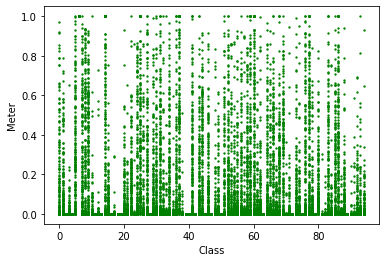

id: 14
Num of cafe 192


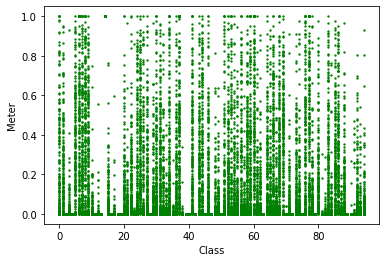

id: 49
Num of hospital 94


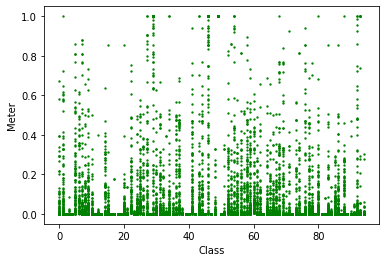

id: 7
Num of bank 199


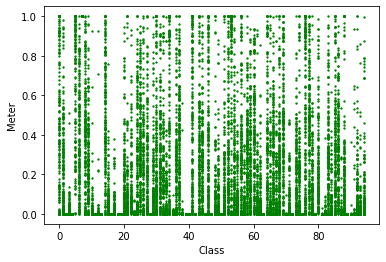

id: 68
Num of park 169


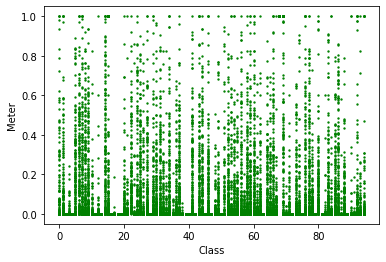

In [32]:
classList = ['bakery', 'cafe', 'hospital' ,'bank', 'park'] 

for c in classList:
    classID = CLASS_LIST.index(c)
    print('id:', classID)
    dataVis = dataframeDecayLA.loc[dataframeDecayLA['class'] == classID]
    print("Num of", c , len(dataVis))
    x = range(len(dataVis.iloc[0]))
    for i in range(len(dataVis)):
        # print (x)
        plt.scatter(
            x[:-1], dataVis.iloc[i][:-1], s, c="g", alpha=0.9, 
            marker= 'o',
        )
    plt.xlabel("Class")
    plt.ylabel("Meter")
    plt.show()

In [33]:
dataDic = OpenJson('data/raw/google-third-place-Redlands.json')
dataSetDis = []
dataSetDecay = []
BATA = 0.01
for i in tqdm(CLASS_LIST):

    for j in range(len(dataDic[i])):
        loc = dataDic[i][j]
        classID = CLASS_LIST.index(i)
        
        resultDis = GetDistanceClosest(loc, dataDic, CLASS_LIST)
        resultDis.append(classID)
        dataSetDis.append(resultDis)

        resultDecay = GetDistanceDecayClosest(loc, dataDic, CLASS_LIST, BATA)
        resultDecay.append(classID)
        dataSetDecay.append(resultDecay)



100%|██████████| 95/95 [01:39<00:00,  1.05s/it]


In [34]:
dataframeDisReadlands = pd.DataFrame.from_records(dataSetDis, columns=[*CLASS_LIST, "class"] )
dataframeDisReadlands.describe()
dataframeDisReadlands.to_csv('data/processed/google-third-place-Redlands_DistanceClosest.csv')

id: 6
Num of bakery 141


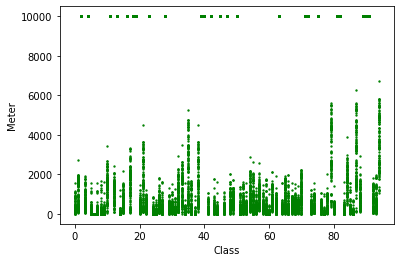

id: 14
Num of cafe 176


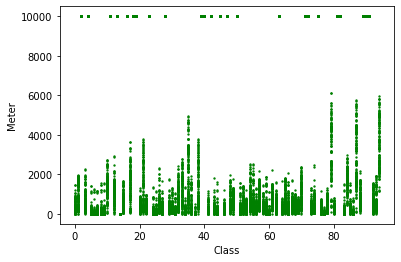

id: 49
Num of hospital 35


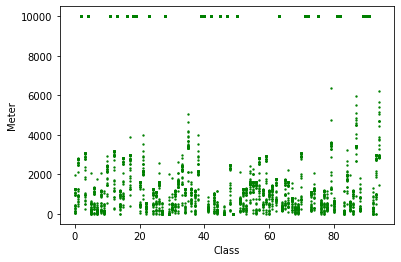

id: 7
Num of bank 148


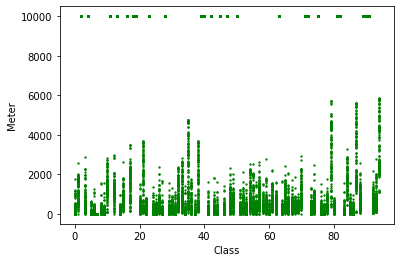

id: 68
Num of park 68


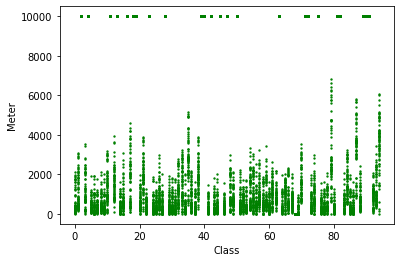

In [35]:
classList = ['bakery', 'cafe', 'hospital' ,'bank', 'park'] 

for c in classList:
    classID = CLASS_LIST.index(c)
    print('id:', classID)
    dataVis = dataframeDisReadlands.loc[dataframeDisReadlands['class'] == classID]
    print("Num of", c , len(dataVis))
    x = range(len(dataVis.iloc[0]))
    for i in range(len(dataVis)):
        # print (x)
        plt.scatter(
            x[:-1], dataVis.iloc[i][:-1], s, c="g", alpha=0.9, 
            marker= 'o',
        )
    plt.xlabel("Class")
    plt.ylabel("Meter")
    plt.show()

In [36]:
dataframeDecayReadlands = pd.DataFrame.from_records(dataSetDecay, columns=[*CLASS_LIST, "class"] )
dataframeDecayReadlands.describe()
dataframeDecayReadlands.to_csv('data/processed/google-third-place-Redlands_DecayClosest.csv')

id: 6
Num of bakery 141


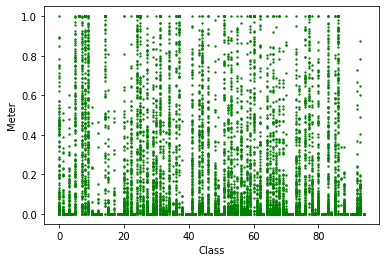

id: 14
Num of cafe 176


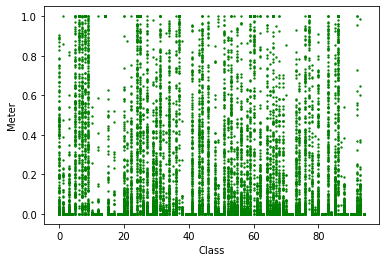

id: 49
Num of hospital 35


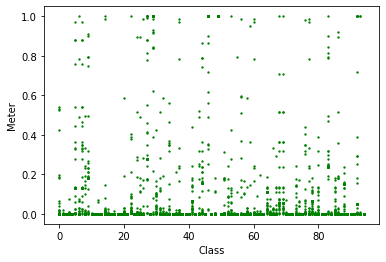

id: 7
Num of bank 148


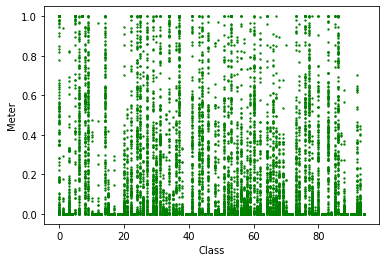

id: 68
Num of park 68


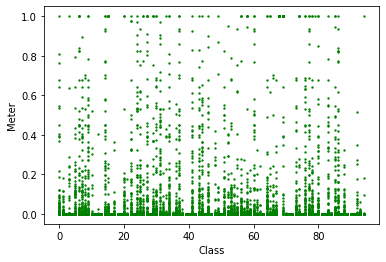

In [37]:
classList = ['bakery', 'cafe', 'hospital' ,'bank', 'park'] 

for c in classList:
    classID = CLASS_LIST.index(c)
    print('id:', classID)
    dataVis = dataframeDecayReadlands.loc[dataframeDecayReadlands['class'] == classID]
    print("Num of", c , len(dataVis))
    x = range(len(dataVis.iloc[0]))
    for i in range(len(dataVis)):
        # print (x)
        plt.scatter(
            x[:-1], dataVis.iloc[i][:-1], s, c="g", alpha=0.9, 
            marker= 'o',
        )
    plt.xlabel("Class")
    plt.ylabel("Meter")
    plt.show()

-----
### References & Useful links

Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore. https://doi.org/10.1007/978-981-33-4400-6_11



Oldenburg, R., Brissett, (1982). D.: The third place. Qual. Sociol. 5(4), 265–284



Lee, Namju. (2022). Computational Design, Seoul, Bookk, https://brunch.co.kr/@njnamju/144



Lee, Namju, (2022). Discrete Urban Space and Connectivity, https://nj-namju.medium.com/discrete-urban-space-and-connectivity-492b3dbd0a81



Woo. Junghyun, (2022). Numeric Network Analysis for Pedestrians, https://axuplatform.medium.com/0-numeric-network-analysis-47a2538e636c



Lee, Namju, (2022). Computational Design Thinking for Designers, https://nj-namju.medium.com/computational-design-thinking-for-designers-68224bb07f5c



Lee, Namju. (2016). Third Place Mobility Energy Consumption Per Person, http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab 
